In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time
import random
import os

from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import classification_report

In [2]:

data=pd.read_csv("data_visco.csv")
data_lasso = pd.read_csv("data_lasso.csv")
data_AIC = pd.read_csv("data_AIC.csv")

Extraction of training and test sample

In [3]:
from sklearn.model_selection import train_test_split  
X_train,X_test,Y_train,Y_test=train_test_split(data.iloc[:,1:],data.iloc[:,:1],test_size=0.2,random_state=11)


In [4]:
Y_train = np.log(Y_train)
Y_test = np.log(Y_test)

Firstly, we fit an one-hidden layer neural network with ReLU activation in the hidden layer and the softmax activation for the out put layer, and the log-loss function. We use here the default configuration for the optimisation task.

In [5]:
from sklearn.neural_network import MLPRegressor

In [6]:
nnet1 = MLPRegressor(hidden_layer_sizes = (3), random_state = 42, max_iter = 1500)
nnet1.fit(X_train, Y_train)

c:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


MLPRegressor(hidden_layer_sizes=3, max_iter=1500, random_state=42)

In [7]:
y_pred = nnet1.predict(X_test)

In [8]:
MSE(Y_test, y_pred)

1.375886699006765

In [9]:
from sklearn.model_selection import GridSearchCV
param_grid = [{"hidden_layer_sizes" : [(3,), (7,), (15,)], "alpha" : [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1]}]

nnet1_cv = GridSearchCV(MLPRegressor(max_iter = 1500, random_state = 42), param_grid, cv = 5, n_jobs=-1, return_train_score = True)
nnet1_cv.fit(X_train, Y_train)

print("Best Mean cross-validated accuracy = %f, Best parameter = %s" % (nnet1_cv.best_score_, nnet1_cv.best_params_))

c:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Best Mean cross-validated accuracy = 0.928003, Best parameter = {'alpha': 0.1, 'hidden_layer_sizes': (7,)}


In [11]:
y_pred_test = nnet1_cv.predict(X_test)

print(MSE(Y_test, y_pred_test))
print(r2_score(Y_test, y_pred_test))

0.8462911647264795
0.9317117859591284


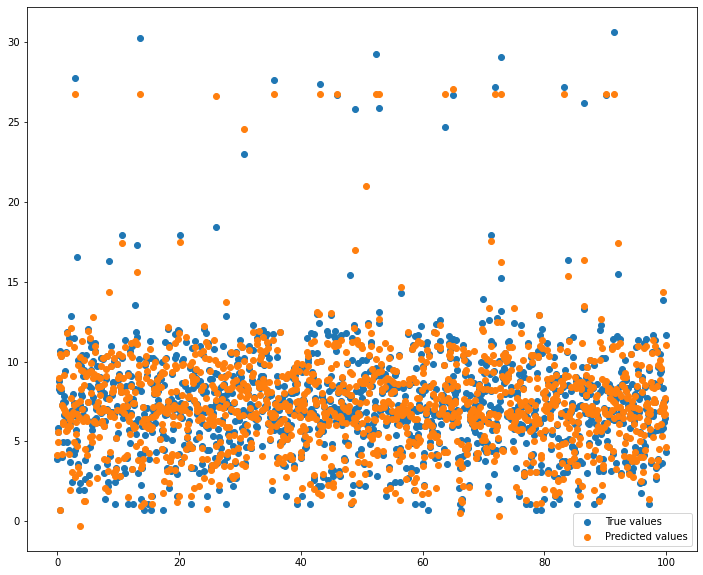

In [ ]:
plt.figure(figsize=(12,10))
x= np.linspace(0,100,len(Y_test))
plt.scatter(x,Y_test,label = "True values")
plt.scatter(x,y_pred_test,label = "Predicted values")
plt.legend()
plt.show()

In [ ]:
Y_test

,vis
152,3.891820
4557,5.826000
172,5.594711
3701,8.758884
4999,8.253228
...,...
2801,7.502738
1565,7.580189
807,6.496775
5726,11.661483


In [ ]:
residus.shape

(1398, 1398)

In [ ]:
np.array(Y_test).squeeze()

array([ 3.8918203 ,  5.82600011,  5.59471138, ...,  6.49677499,
       11.66148339,  4.34380542])

c:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


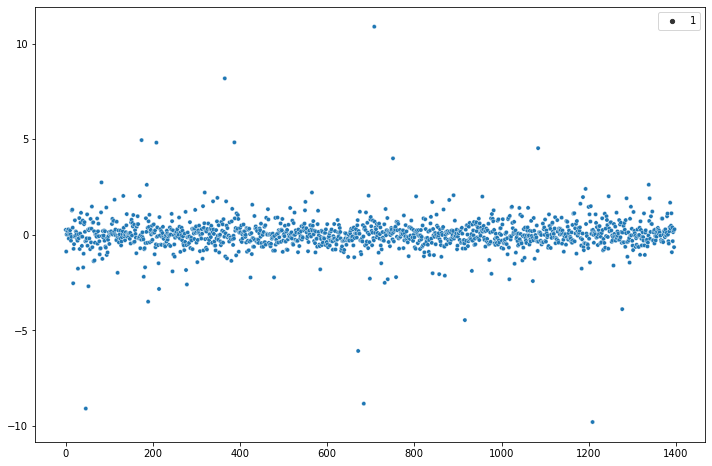

In [ ]:
residus = y_pred_test - np.array(Y_test).squeeze()
n_test = len(y_pred_test)
plt.figure(figsize = (12,8))
sns.scatterplot(range(n_test), residus, size = 1)
# plt.scatter(range(n_test), np.array(Y_test).squeeze())
# plt.plot(residus)
plt.show()

In [13]:
nnet2 = MLPRegressor(hidden_layer_sizes = (55, 35, 20, 10, 5), activation = "relu", random_state = 42, max_iter = 1500)
nnet2.fit(X_train, Y_train)

c:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


MLPRegressor(hidden_layer_sizes=(55, 35, 20, 10, 5), max_iter=1500,
             random_state=42)

In [14]:
y_pred_2 = nnet2.predict(X_test)

In [19]:
MSE(Y_test, y_pred_2)
r2_score(Y_test, y_pred_2)

0.9550755629179244

c:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


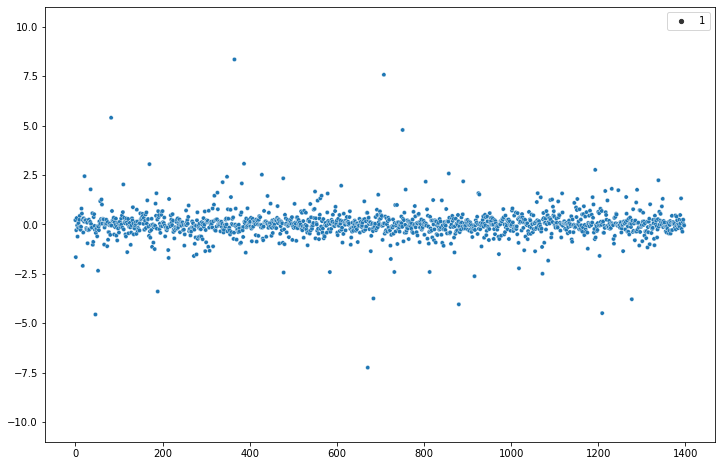

In [18]:
residus = y_pred_2 - np.array(Y_test).squeeze()
n_test = len(y_pred_2)
plt.figure(figsize = (12,8))
sns.scatterplot(range(n_test), residus, size = 1)
# plt.scatter(range(n_test), np.array(Y_test).squeeze())
# plt.plot(residus)
plt.ylim((-11,11))
plt.show()

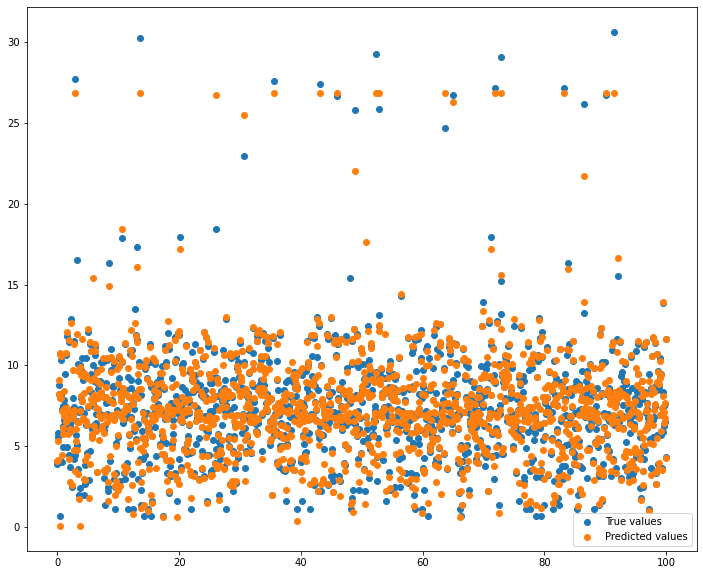

In [ ]:
plt.figure(figsize=(12,10))
x= np.linspace(0,100,len(Y_test))
plt.scatter(x,Y_test,label = "True values")
plt.scatter(x,y_pred_2,label = "Predicted values")
plt.legend()
plt.show()

## Gaussian Process

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor

In [ ]:
reg = GaussianProcessRegressor()
regGauss = reg.fit(X_train, Y_train)
y_pred = regGauss.predict(X_test)
print(MSE(Y_test, y_pred))
print(r2_score(Y_test, y_pred))

53.559951963112354
-3.3218145434118105


In [ ]:
from sklearn.model_selection import GridSearchCV
param = [{"alpha" : np.linspace(0,2,50)}]
reg= GridSearchCV(GaussianProcessRegressor(),param, cv = 5, n_jobs=-1)
GauProReg = reg.fit(X_train, Y_train)
print("Best Mean cross-validated accuracy = %f, Best parameter = %s" % (GauProReg.best_score_, GauProReg.best_params_))

c:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [        nan -1.76055699 -1.77992569 -1.799493   -1.81882825 -1.83789823
 -1.85669621 -1.87521536 -1.89344834 -1.91138863 -1.92903131 -1.94637323
 -1.96341301 -1.98015086 -1.99658835 -2.01272816 -2.02857393 -2.04413003
 -2.0594014  -2.07439342 -2.08911181 -2.10356252 -2.11775164 -2.13168535
 -2.14536987 -2.15881141 -2.17201613 -2.18499012 -2.19773939 -2.21026984
 -2.22258723 -2.23469721 -2.24660527 -2.25831679 -2.26983698 -2.28117091
 -2.2923235  -2.30329953 -2.31410363 -2.32474029 -2.33521388 -2.34552859
 -2.35568852 -2.36569762 -2.37555971 -2.38527849 -2.39485755 -2.40430037
 -2.4136103  -2.42279058]
  warnings.warn(


Best Mean cross-validated accuracy = -1.760557, Best parameter = {'alpha': 0.04081632653061224}


In [ ]:
y_pred_gauss = GauProReg.predict(X_test)
print(MSE(Y_test, y_pred_gauss))
print(r2_score(Y_test, y_pred_gauss))

29.090582272432098
-1.347352768872966
